# Kalman Filter

In [41]:
import numpy as np 
import matplotlib.pyplot as plt 

data = np.load("data.npz")
measurements = data["measurements"]
targetState = data["targetState"]

print(measurements.shape, targetState.shape)


(60, 2) (60, 4)


In [42]:
"""Initializing F, H, Q, R"""

# time step 
dt = 1 
# state = [x, y, dx dy]

# state transition matrix 
F = np.array([
    [1, 0, dt, 0], 
    [0, 1, 0, dt], 
    [0, 0, 1, 0], 
    [0, 0, 0, 1]
]) 
# process noise intensity 
proNoise = 0.01 
# state transition covariance
Q = np.array([
    [dt**3/3, 0, dt**2/2, 0], 
    [0, dt**3/3, 0, dt**2/2], 
    [dt**2/2, 0, dt, 0], 
    [0, dt**2/2, 0, dt]
]) * proNoise
# measurement erro std
sigmaX = sigmaY = 5 
# measurement noise covariance 
R = np.diag([sigmaX**2, sigmaY**2]) 
# measuremnet matrix
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

In [75]:
def predict(xposterior, Pposterior):
    xprior = F @ xposterior
    Pprior = F @ Pposterior @ F.T + Q
    return xprior, Pprior

def update(measurement, xprior, Pprior):
    xposterior = xprior + Pprior @ H.T @ np.linalg.inv(R + H @ Pprior @ H.T) @ (measurement - H @ xprior)
    Pposterior = Pprior - Pprior @ H.T @ np.linalg.inv(R + H @ Pprior @ H.T) @ H @ Pprior
    return xposterior, Pposterior

def kalmanfilter(measurements):
    # estimated state and its covariance
    x = np.zeros_like(targetState) # (60, 4)
    P = np.zeros_like(Q) # (4, 4)

    # initialization 
    x[0, 0:2] = measurements[0, 0:2]
    P[0:2, 0:2] = R
    P[0:2, 2:4] = R / dt
    P[2:4, 0:2] = R / dt
    P[2:4, 2:4] = 2*R / dt**2

    xposterior = x[0]
    Pposterior = P

    for i in range(1, measurements.shape[0]):
        xprior, Pprior = predict(xposterior, Pposterior)
        xposterior, Pposterior = update(measurements[i], xprior, Pprior)
        x[i] = xposterior

    return x

x = kalmanfilter(measurements)


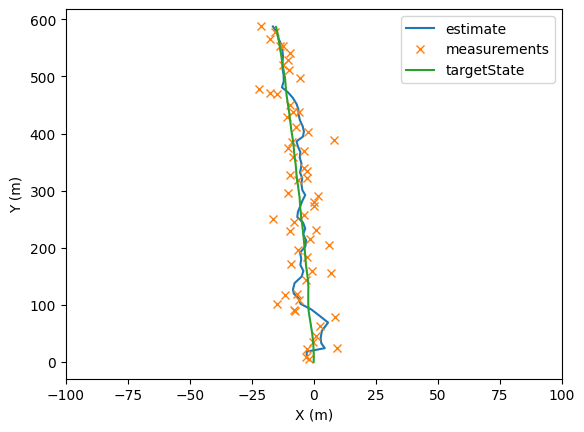

In [76]:
def plot_all(x, targetState, measurements):
    estimate = x @ H.T

    plt.figure()
    plt.plot(estimate[:, 0], estimate[:, 1])
    plt.plot(measurements[:, 0], measurements[:, 1], 'x')
    plt.plot(targetState[:, 0], targetState[:, 1])
    plt.xlim([-100, 100])
    plt.legend(['estimate', 'measurements', 'targetState'])
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.show()

plot_all(x, targetState, measurements)